In [2]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt

import seaborn as sns
import math
import altair as alt

from Functions import * 

# Matplot Libs 

from matplotlib.colors import LinearSegmentedColormap
# Ml Libs 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.utils.class_weight import compute_sample_weight
#regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score

In [3]:
Source=pd.read_csv('/Users/rohit.jishtu/Documents/My Projects/Project Personal/Churn Models/SourceData/churn-bigml-80.csv')
Test=  pd.read_csv('/Users/rohit.jishtu/Documents/My Projects/Project Personal/Churn Models/SourceData/churn-bigml-20.csv')

print('DataSize is ', Source.shape)
Source['index']=Source.index
SourceRaw=Source

DataSize is  (2666, 20)


In [4]:
SourceRaw

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,index
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,2
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,3
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,16.12,221.4,128,9.96,11.8,5,3.19,2,False,2661
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,2662
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,2663
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,2664


   Churn  index  Percentage
0  False   2278   85.446362
1   True    388   14.553638


Text(0.5, 1.0, 'Target Distribution')

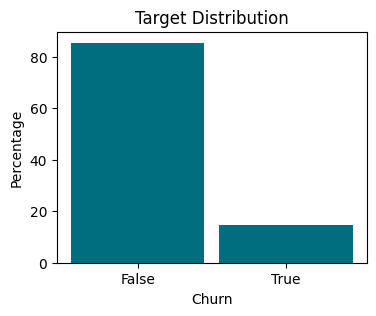

In [5]:
# Step 1: Target Distribution Check in Training Data 
# Checking Target Distribution for Churn 

Target=Source['Churn']
Source['index']=Source.index
Key=Source['index']


# Calculating target 
Source[Target].value_counts()/Source.shape[0]
Targetdf=Source.groupby(['Churn'])['index'].count().reset_index()
Targetdf['Percentage'] = Targetdf.groupby(Target)['index'].transform(lambda x: x / x.sum() * 100)
print(Targetdf)


# Plotting target
plt.figure(figsize=(4, 3))
Targetdf['Churn']=Targetdf['Churn'].astype(str)
plt.bar( Targetdf['Churn'], Targetdf['Percentage'],color='#006E7F', width=0.9, align='center') 

plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Target Distribution')


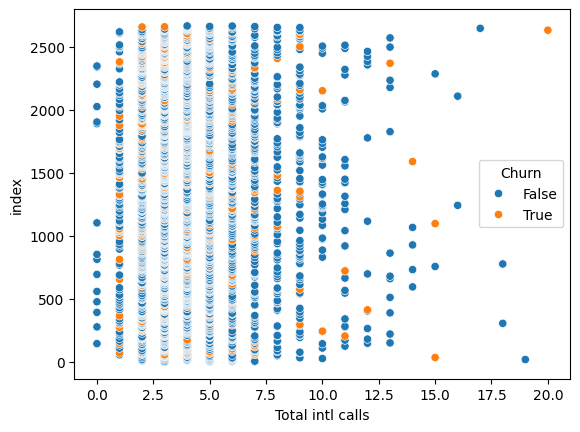

In [6]:
# Plot of Target with Cols 

def Scatter_Plotwithtarget(df,x,y,z):
    sns.scatterplot(x=x, y=y,hue=z)
Scatter_Plotwithtarget(Source,Source['Total intl calls'],Source['index'],Source['Churn'])

In [7]:
# Step 2: Basic Stats Check 

In [8]:
outdf_numeric = CalBasicStats(Source,'numeric')
outdf_nonnumeric = CalBasicStats(Source,'Non-numeric')

In [9]:
# variables which can be considered or removing vbecause of sparsity and lack of variation :

# Number vmail messages #has very high value of zero (72%)
# Total day minutes  # has very high variance 
# Total intl calls  # High Skeness (gap between max and Average)

# variable Transformation 



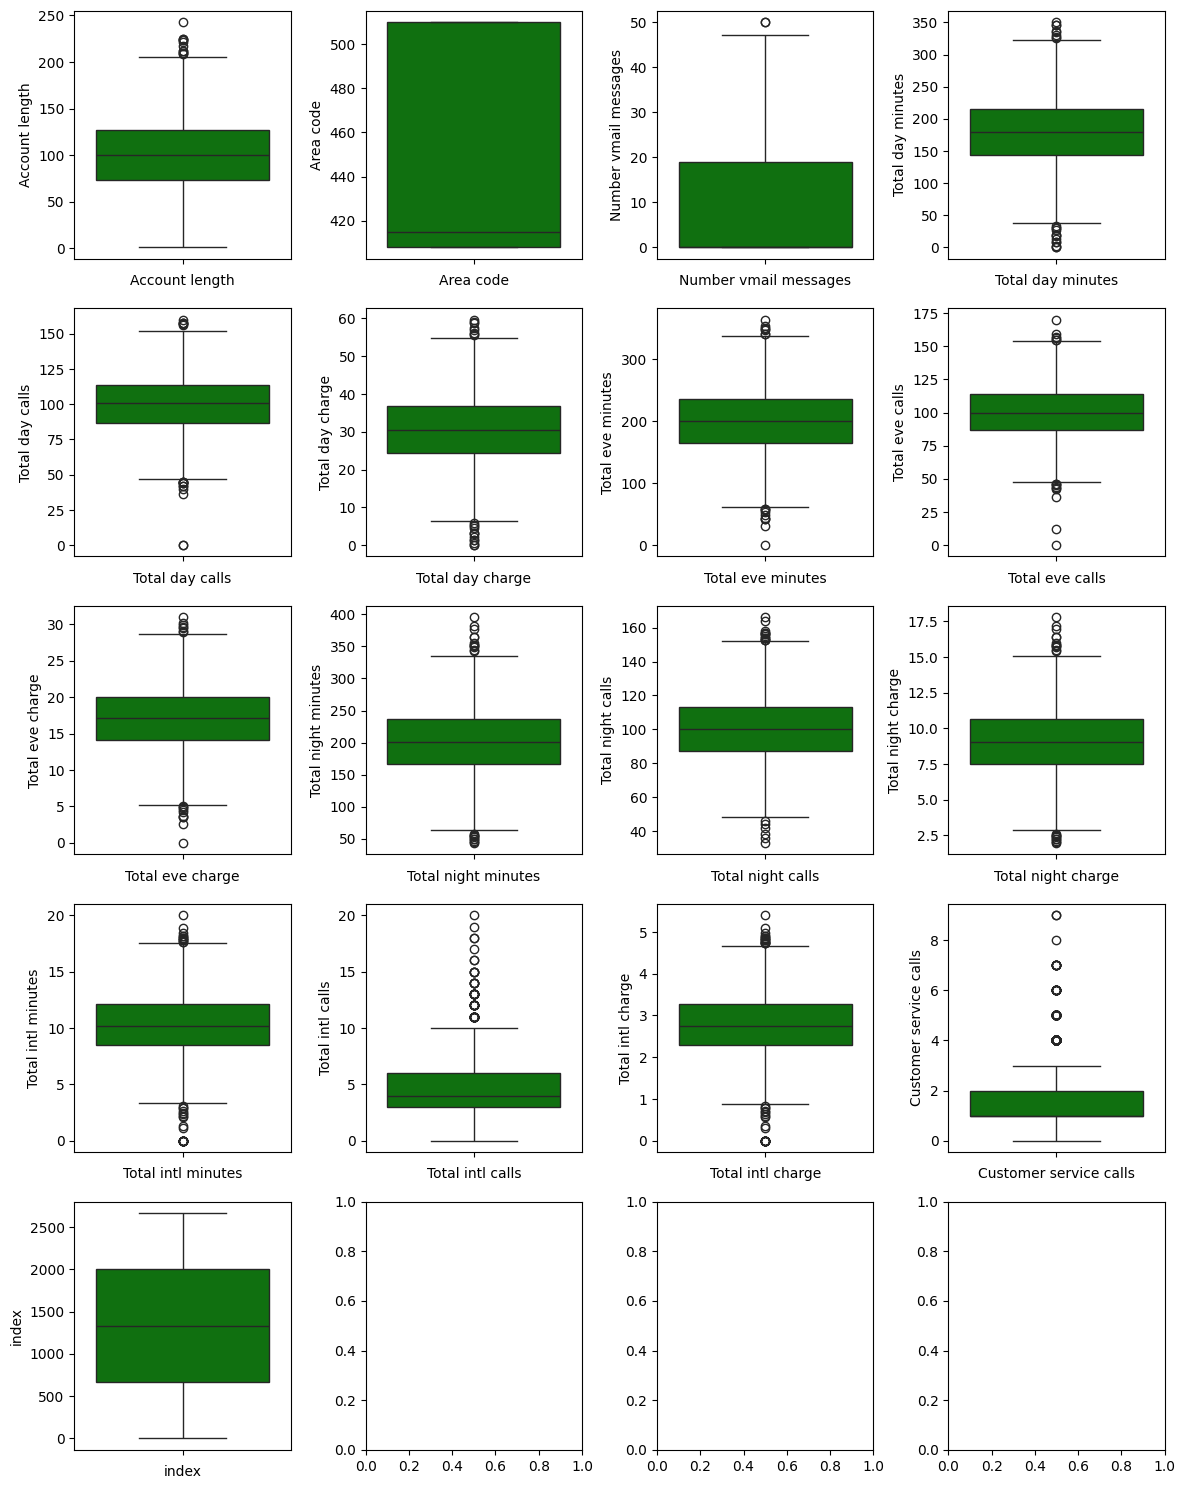

In [10]:
# Step 3.1 : Check for outliers using the Box Plots 

Cols_numeric=outdf_numeric['ColumnName'].unique()
CustomPlots(Source[Cols_numeric],'box')

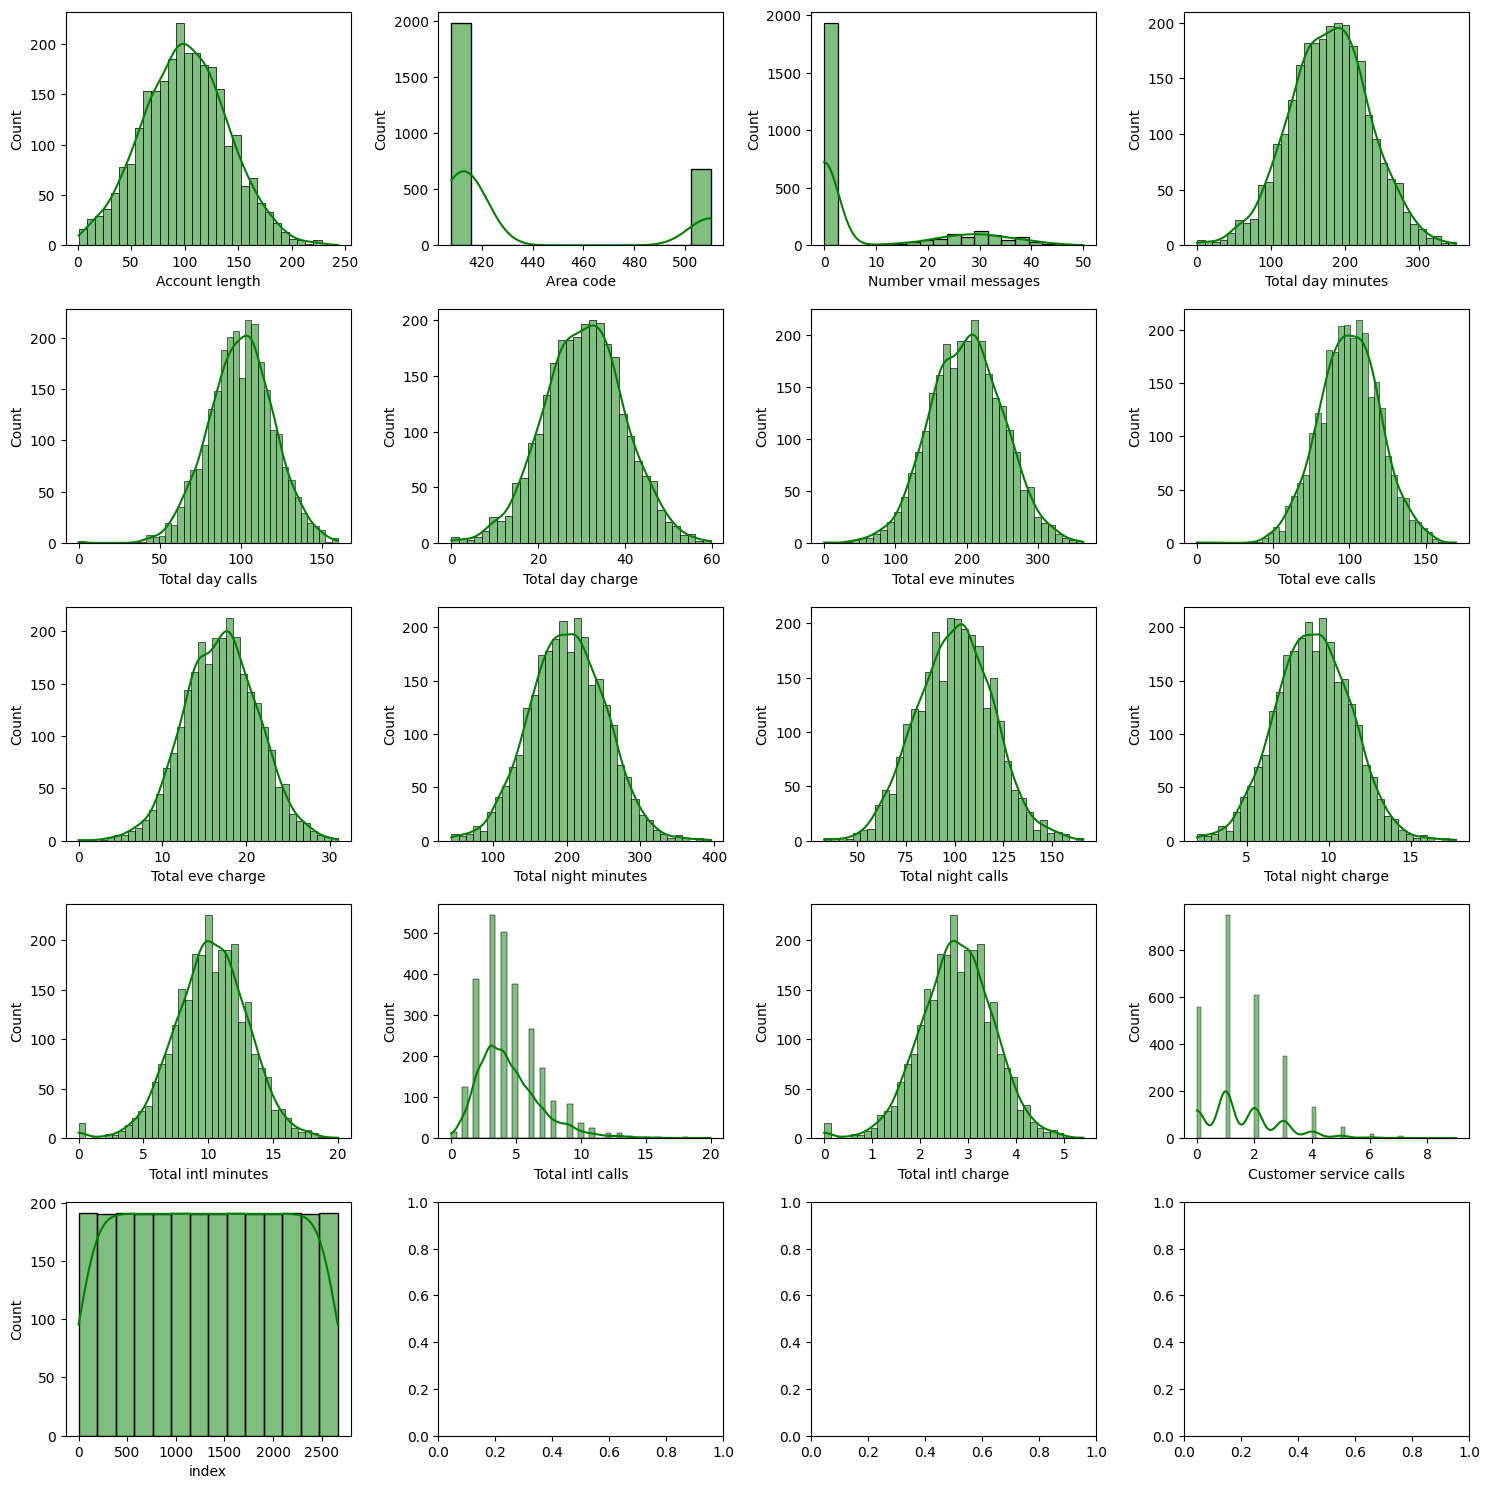

In [11]:
Cols_numeric=outdf_numeric['ColumnName'].unique()
CustomPlots(Source[Cols_numeric],'hist')

<Axes: >

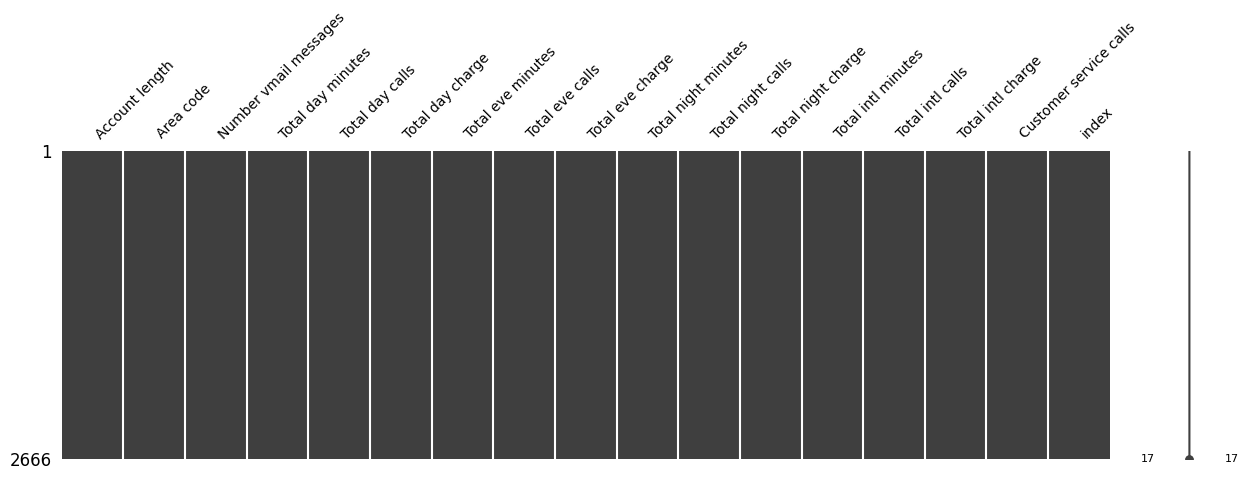

In [12]:
# Step 3.2 : Check for Missing Values using the Box Plots 

import missingno as msno
msno.matrix(Source[Cols_numeric], figsize=(15, 4), fontsize=10)


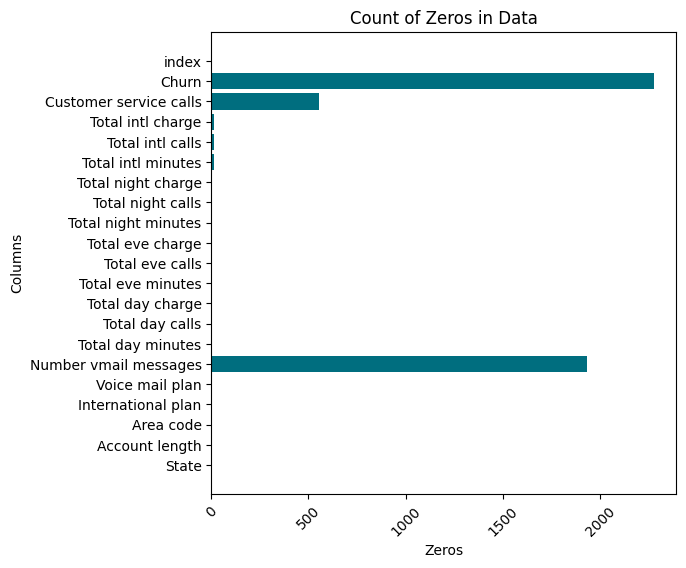

In [13]:
# Step 3.3 : Check for Zero Values using the Box Plots 


zero_counts = (Source == 0).sum()

# Plot the counts
plt.figure(figsize=(6,6))
plt.barh(zero_counts.index, zero_counts.values, color='#006E7F')
plt.xlabel('Zeros')
plt.ylabel('Columns')
plt.title('Count of Zeros in Data')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Step 4 : Feature Selection 

AllFeatures=SourceRaw.columns.to_list()
SelectedFeatures=AllFeatures



# Step 4.0: Remove PrimaryKey, sequence etc features 
cols0=['index','Area code']
for i in cols0:
    SelectedFeatures.remove(i)

SelectedFeatures


# Step 4.1 : Removal very high missing values columns 

# No Null in Data 
outdf_numeric=outdf_numeric[outdf_numeric['ColumnName'].isin(SelectedFeatures)]
SelectedFeatures= np.where((outdf_numeric["%Missing"]<40),outdf_numeric["ColumnName"],'Churn')
SelectedFeatures=set(SelectedFeatures)

#Columns only with <50% Available values 
SelectedFeatures_NN= np.where((outdf_nonnumeric["%Missing"]<30),outdf_nonnumeric["ColumnName"],'ExtractDate')
SelectedFeatures_NN=set(SelectedFeatures_NN)
SelectedFeatures =SelectedFeatures | SelectedFeatures_NN
SelectedFeatures

# Step 4.2 : Removal of very high zero values  

outdf_numeric=outdf_numeric[outdf_numeric['ColumnName'].isin(SelectedFeatures)]
SelectedFeatures= np.where((outdf_numeric["%Zero"]<40),outdf_numeric["ColumnName"],'Churn')
SelectedFeatures=set(SelectedFeatures)
SelectedFeatures =SelectedFeatures | SelectedFeatures_NN

SelectedFeatures



{'Account length',
 'Churn',
 'Customer service calls',
 'International plan',
 'State',
 'Total day calls',
 'Total day charge',
 'Total day minutes',
 'Total eve calls',
 'Total eve charge',
 'Total eve minutes',
 'Total intl calls',
 'Total intl charge',
 'Total intl minutes',
 'Total night calls',
 'Total night charge',
 'Total night minutes',
 'Voice mail plan'}

/var/folders/6y/6hsqd4ts2n3cjf9tpct0b36h0000gp/T/ipykernel_36889/2412935066.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Source=SourceRaw[SelectedFeatures]


before (2666, 18)
After (2651, 18)


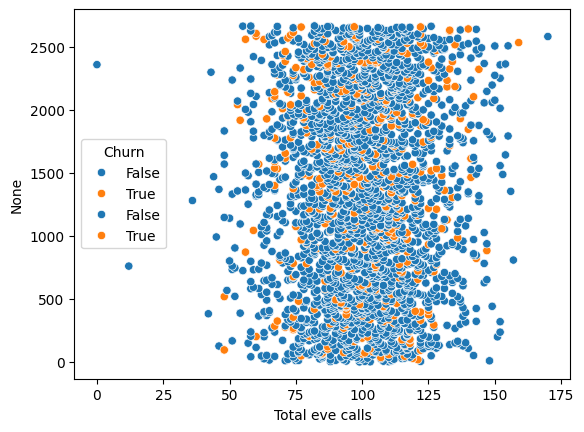

In [15]:

# Step 4.3. Treatment of outlier columns 

# Outlier columns 
# 1. Apart from a few , rest all we see close to the upper limit in BoX Plot , 
#         1.a so we can always put them to higher limit 
#         2.a or leave them as is 
# 2. For the ones where we see high values 
#         1. we will treat them based on the distribution and domain idea 

Source=SourceRaw[SelectedFeatures]

Scatter_Plotwithtarget(Source,Source['Total eve calls'],Source.index,Source['Churn'])
print('before',Source.shape)
Source=remove_outliers_iqr(Source,'Total eve calls')
print('After',Source.shape)
Scatter_Plotwithtarget(Source,Source['Total eve calls'],Source.index,Source['Churn'])

In [19]:
# Step 4.4 : Correlation with categorical 

# label Encode Cat features and FInding Correlation 
from scipy.stats import chi2_contingency
SelectedFeatures_NN
for i in SelectedFeatures_NN:
    contingency_table = pd.crosstab(Source[i], Source['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(i)
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")

# 'State'-- Statistically Significant relationship 


SelectedFeatures.add('State')


Voice mail plan
Chi-Square Statistic: 25.573170369847894
P-Value: 4.259205947131417e-07
State
Chi-Square Statistic: 79.30795156447313
P-Value: 0.005197692948944192
International plan
Chi-Square Statistic: 197.93716118746121
P-Value: 5.888448778610427e-45




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


The palette list has fewer values (5) than needed (51) and will cycle, which may produce an uninterpretable plot.


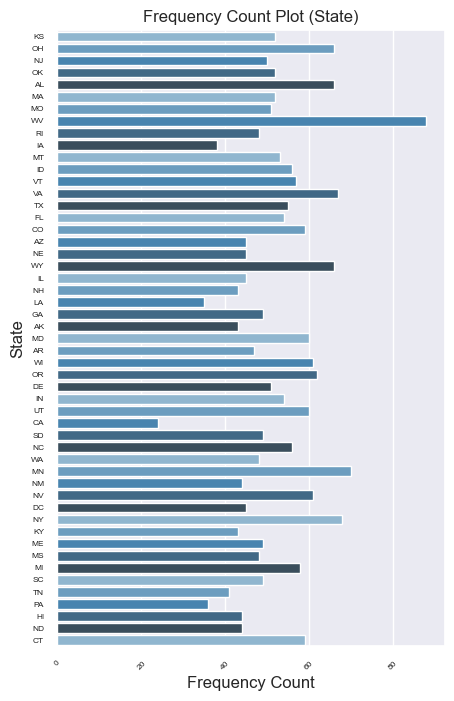

In [20]:
# Step 4.5 : CAtegorical Frequency PLots   

custom_palette = sns.color_palette("Blues_d", n_colors=5)
sns.set(style="darkgrid")
plt.figure(figsize=(5, 8))

ax = sns.countplot(data=SourceRaw, y='State', palette=custom_palette)


ax.tick_params(axis='both', which='both', labelsize=6)
plt.xlabel('Frequency Count',fontsize=12)
plt.ylabel('State')
plt.title('Frequency Count Plot (State)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


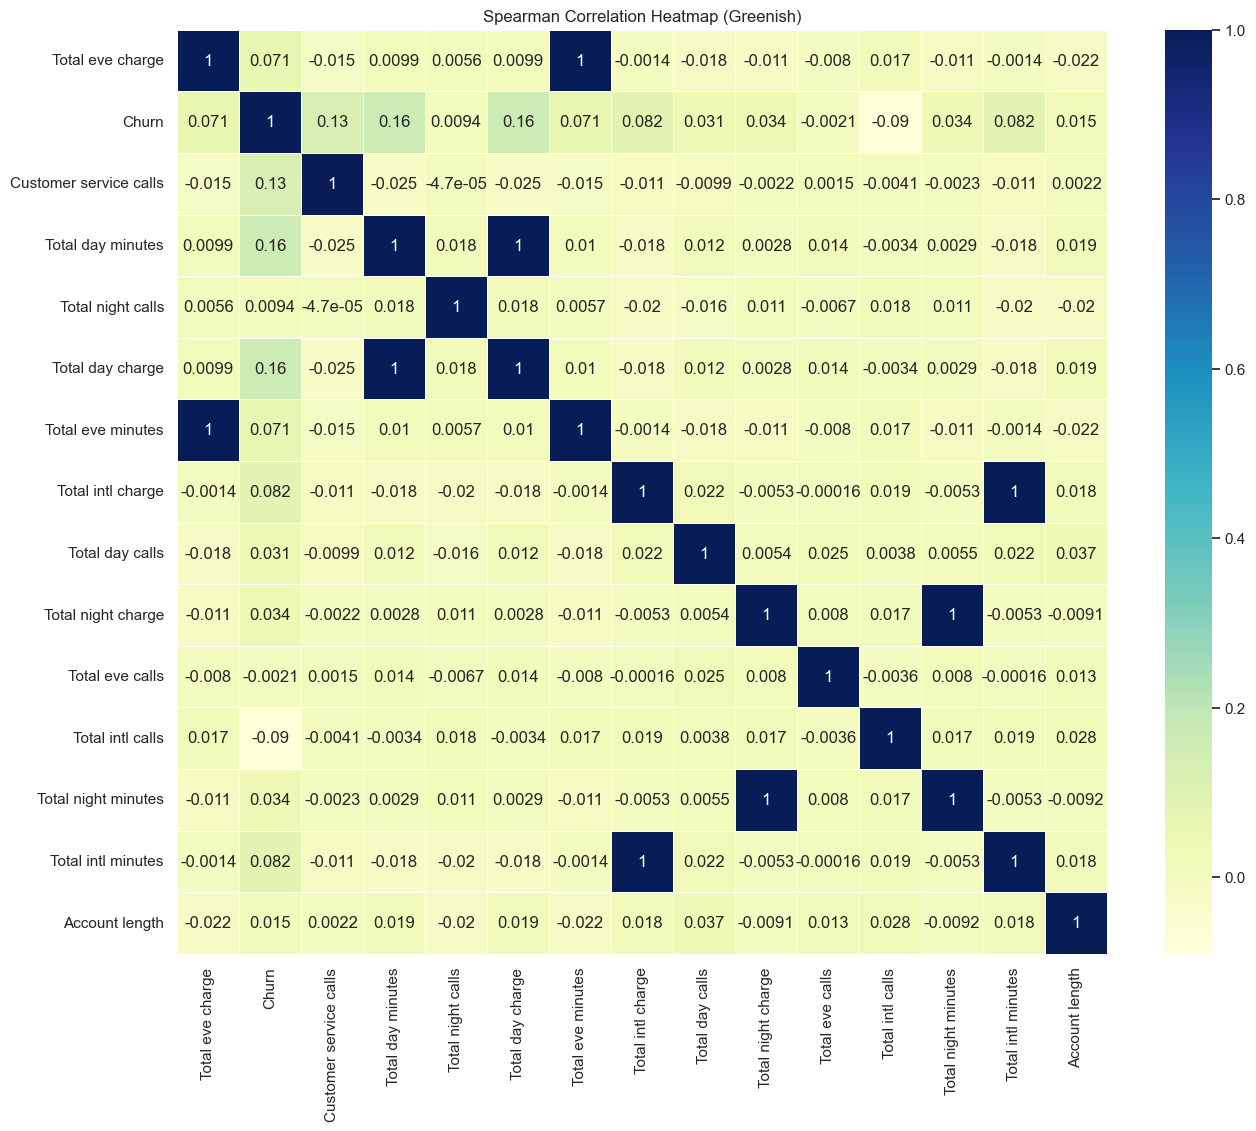

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


['Total eve charge',
 'Churn',
 'Customer service calls',
 'Total day minutes',
 'Total day charge',
 'Total eve minutes',
 'Total intl charge',
 'Total day calls',
 'Total night charge',
 'Total intl calls',
 'Total night minutes',
 'Total intl minutes']

In [21]:
# Selecting highly Correlated features with Target
# Step 4.6 : Correlation with All 


Source=Source[SelectedFeatures]

spearman_corr = Source.corr(method='spearman')

plt.figure(figsize=(15, 12))  # Set the figure size
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', linewidths=0.5)  # Use 'YlGnBu' colormap
plt.title('Spearman Correlation Heatmap (Greenish)')
plt.show()


CorrelationDF=pd.DataFrame()
CorrelatedList,CorrelationDF=CorrAttributesList(Source,'Churn',0.02)
CorrelatedList=CorrelatedList.to_list()

CorrelatedList

# Function to eliminate multicoliniearity 


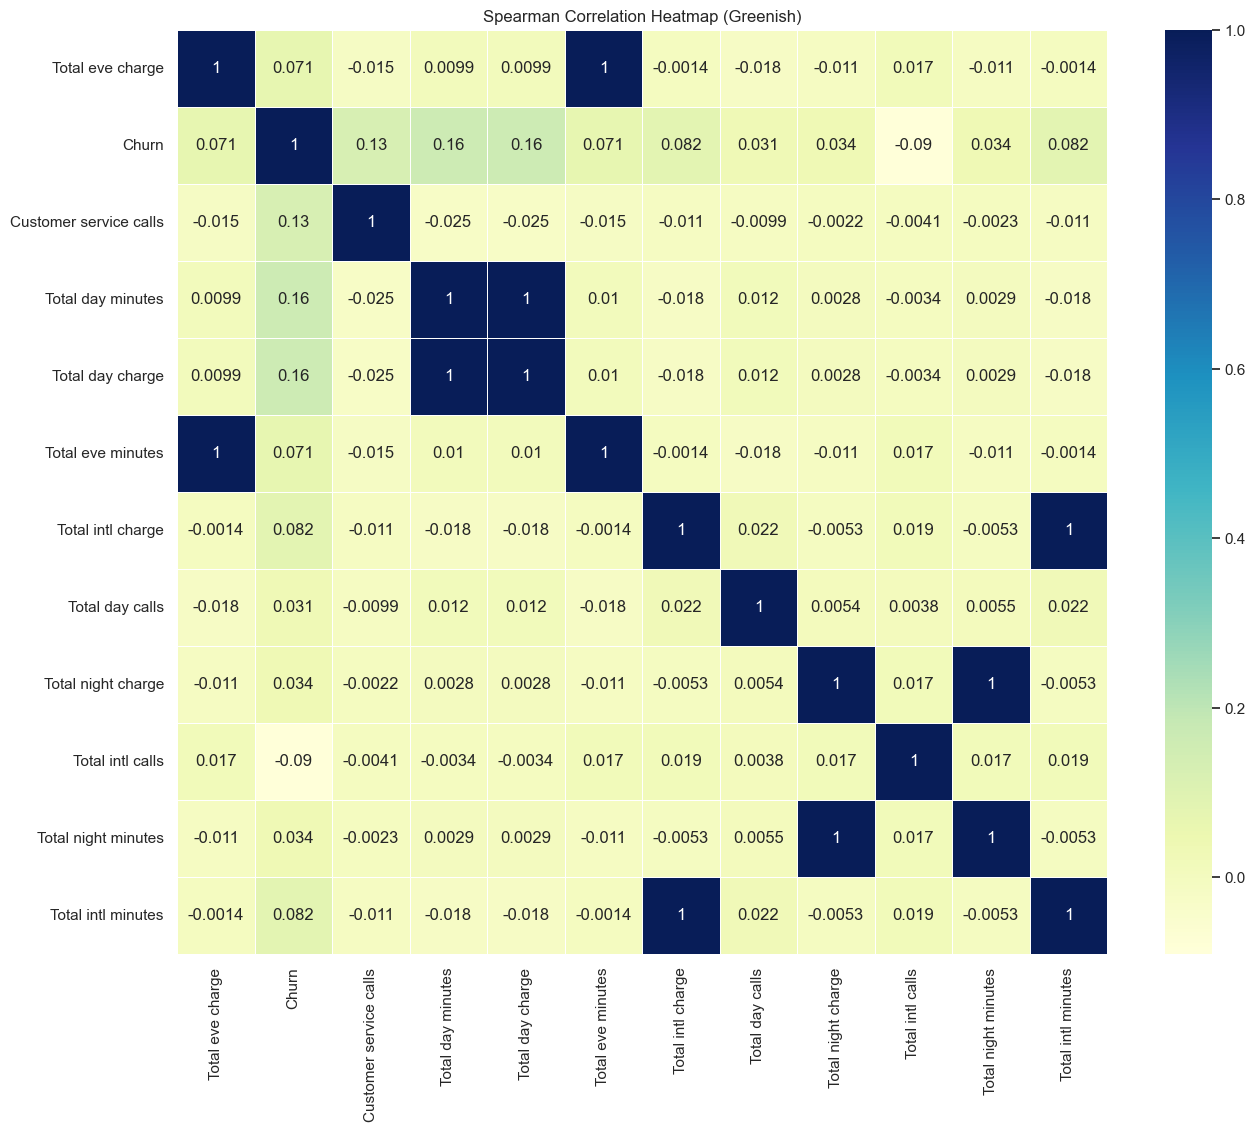

In [22]:
Source=Source[CorrelatedList]

spearman_corr = Source.corr(method='spearman')

plt.figure(figsize=(15, 12))  # Set the figure size
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', linewidths=0.5)  # Use 'YlGnBu' colormap
plt.title('Spearman Correlation Heatmap (Greenish)')
plt.show()

In [23]:
Source=SourceRaw[CorrelatedList]
# Remove highly Correlated 
# CorrelatedList.remove('Total eve minutes')
# CorrelatedList.remove('Total intl minutes')
CorrelatedList.remove('Total night charge')

SelectedFeatures=CorrelatedList

In [24]:
SelectedFeatures

['Total eve charge',
 'Churn',
 'Customer service calls',
 'Total day minutes',
 'Total day charge',
 'Total eve minutes',
 'Total intl charge',
 'Total day calls',
 'Total intl calls',
 'Total night minutes',
 'Total intl minutes']

In [25]:
# Step 4 -Final :

# below features ready for baseline modeled 
Source=SourceRaw[SelectedFeatures]
Source

,Total eve charge,Churn,Customer service calls,Total day minutes,Total day charge,Total eve minutes,Total intl charge,Total day calls,Total intl calls,Total night minutes,Total intl minutes
0,16.78,False,1,265.1,45.07,197.4,2.70,110,3,244.7,10.0
1,16.62,False,1,161.6,27.47,195.5,3.70,123,3,254.4,13.7
2,10.30,False,0,243.4,41.38,121.2,3.29,114,5,162.6,12.2
3,5.26,False,2,299.4,50.90,61.9,1.78,71,7,196.9,6.6
4,12.61,False,3,166.7,28.34,148.3,2.73,113,3,186.9,10.1
...,...,...,...,...,...,...,...,...,...,...,...
2661,16.12,False,2,134.7,22.90,189.7,3.19,98,5,221.4,11.8
2662,18.32,False,2,156.2,26.55,215.5,2.67,77,6,279.1,9.9
2663,13.04,False,3,231.1,39.29,153.4,2.59,57,4,191.3,9.6
2664,24.55,False,2,180.8,30.74,288.8,3.81,109,6,191.9,14.1


In [26]:
Source

,Total eve charge,Churn,Customer service calls,Total day minutes,Total day charge,Total eve minutes,Total intl charge,Total day calls,Total intl calls,Total night minutes,Total intl minutes
0,16.78,False,1,265.1,45.07,197.4,2.70,110,3,244.7,10.0
1,16.62,False,1,161.6,27.47,195.5,3.70,123,3,254.4,13.7
2,10.30,False,0,243.4,41.38,121.2,3.29,114,5,162.6,12.2
3,5.26,False,2,299.4,50.90,61.9,1.78,71,7,196.9,6.6
4,12.61,False,3,166.7,28.34,148.3,2.73,113,3,186.9,10.1
...,...,...,...,...,...,...,...,...,...,...,...
2661,16.12,False,2,134.7,22.90,189.7,3.19,98,5,221.4,11.8
2662,18.32,False,2,156.2,26.55,215.5,2.67,77,6,279.1,9.9
2663,13.04,False,3,231.1,39.29,153.4,2.59,57,4,191.3,9.6
2664,24.55,False,2,180.8,30.74,288.8,3.81,109,6,191.9,14.1


In [27]:
# Step 5 : Features Creation (Specially Categorical and Ratios )







In [28]:
# Step 6.1 : Bi variate using Dtree 

Resultdf1,model = DtreeCreator(Source,'Total intl charge','Churn',1)
Resultdf1
PlotDtreeGraph2(Resultdf1)


Total intl charge 



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


alt.LayerChart(...)

In [34]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 692.0 kB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
# # Exporting The Tree

# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# import graphviz

# dot_data = export_graphviz(model, out_file=None,
#                            feature_names=X.columns,
#                            class_names='Churn',
#                            filled=True, rounded=True,
#                            special_characters=True)


# graph = graphviz.Source(dot_data)
# # Save the decision tree visualization as an image
# graph.render('decision_tree_sample1')


In [38]:
#Step 7 : Model Build Logictic , Decision Tree and randowm Forest 



#Features removed as part of TargetLeakage
Targets = ['Churn']

FeatureList= [x for x in SelectedFeatures if x not in Targets]

X=Source[FeatureList]
Y=Source['Churn']

#------------------------------------------------------------------------
# Random train test split And Model Build

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model='Dtree'
# Dtree_Model_clf = DecisionTreeClassifier(max_depth=5)
Dtree_Model_clf = DecisionTreeClassifier(criterion='entropy',
                                         max_depth=6,
                                         max_features=None,
                                         min_samples_split=5,
                                         min_samples_leaf=2,
                                         class_weight='balanced')


#Logictic reg 
# Model='LogicticReg'
# Dtree_Model_clf = LogisticRegression()


#------------------------------------------------------------------------

#Model Fit 
Dtree_Model_clf.fit(X_train, y_train)

#Model Predict

custom_threshold = 0.42
y_pred = Dtree_Model_clf.predict(X_test)
y_pred_proba=Dtree_Model_clf.predict_proba(X_test)
predicted_class1 = (y_pred_proba[:, 1] >= custom_threshold).astype(int)


# Confusion matrix
cm1 = confusion_matrix(y_test, predicted_class1)
#Feature Importance 
if Model=='Dtree':
    feature_importances = Dtree_Model_clf.feature_importances_

In [39]:
#Step 8 : Model Matrix on Fist Test Set 
from sklearn.metrics import roc_curve, auc,f1_score,roc_auc_score

# Calculate accuracy [Built in function]
accuracy = accuracy_score(y_test, predicted_class1)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, predicted_class1)
print("Precision:", precision)
# Calculate recall
recall = recall_score(y_test, predicted_class1)
print("Recall:", recall)

f1 = f1_score(y_test, predicted_class1)
print("F1 Score:", f1)
# Calculate AUC

auc = roc_auc_score(y_test, predicted_class1)
print("AUC:", auc)




# Model 1 - Without multicolinearity removal 
# Accuracy: 0.8801498127340824
# Precision: 0.6470588235294118
# Recall: 0.4177215189873418
# F1 Score: 0.5076923076923078
# AUC: 0.6890805397134511

# Model 2 - With
# Accuracy: 0.8764044943820225
# Precision: 0.6444444444444445
# Recall: 0.3670886075949367
# F1 Score: 0.46774193548387094
# AUC: 0.6659618862150508

# Model 2 - With HyperParameters
# Accuracy: 0.8913857677902621
# Precision: 0.7142857142857143
# Recall: 0.4430379746835443
# F1 Score: 0.5468749999999999
# AUC: 0.7061343719571568

# Model 3 - With Threshhold
# Accuracy: 0.8389513108614233
# Precision: 0.472
# Recall: 0.7468354430379747
# F1 Score: 0.5784313725490197
# AUC: 0.8008902489915148

# LogictiC Reg
# Accuracy: 0.8520599250936329
# Precision: 0.5
# Recall: 0.02531645569620253
# F1 Score: 0.048192771084337345
# AUC: 0.510460425650299

Accuracy: 0.7883895131086143
Precision: 0.38961038961038963
Recall: 0.759493670886076
F1 Score: 0.5150214592274679
AUC: 0.7764501321463347


In [40]:
#Step 8.2 : Model Matrix on Hidden Scoring Set 
Targets = ['Churn']

FeatureList= [x for x in SelectedFeatures if x not in Targets]
X=Test[FeatureList]
Y=Test['Churn']

#Model Predict


y_pred2 = Dtree_Model_clf.predict(X)
y_pred2_proba=Dtree_Model_clf.predict_proba(X)
predicted_class2 = (y_pred2_proba[:, 1] >= custom_threshold).astype(int)


cm2 = confusion_matrix(Y, predicted_class2)

# Calculate accuracy [Built in function]
accuracy = accuracy_score(Y, predicted_class2)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(Y, predicted_class2)
print("Precision:", precision)
# Calculate recall
recall = recall_score(Y, predicted_class2)
print("Recall:", recall)

f1 = f1_score(Y, predicted_class2)
print("F1 Score:", f1)
# Calculate AUC

auc = roc_auc_score(Y, predicted_class2)
print("AUC:", auc)



#Model 1
# Accuracy: 0.904047976011994
# Precision: 0.7012987012987013
# Recall: 0.5684210526315789
# F1 Score: 0.627906976744186
# AUC: 0.7641056312108944

#Model 2
# Accuracy: 0.9145427286356822
# Precision: 0.7878787878787878
# Recall: 0.5473684210526316
# F1 Score: 0.6459627329192547
# AUC: 0.7614464482885535

#Model 3 - With Hyperparameters 
# Accuracy: 0.896551724137931
# Precision: 0.6857142857142857
# Recall: 0.5052631578947369
# F1 Score: 0.5818181818181819
# AUC: 0.7334008097165993


# LogictiC Reg
# Accuracy: 0.8515742128935532
# Precision: 0.25
# Recall: 0.021052631578947368
# F1 Score: 0.038834951456310676
# AUC: 0.5052815605447184

Accuracy: 0.7841079460269865
Precision: 0.3675675675675676
Recall: 0.7157894736842105
F1 Score: 0.4857142857142857
AUC: 0.755622009569378


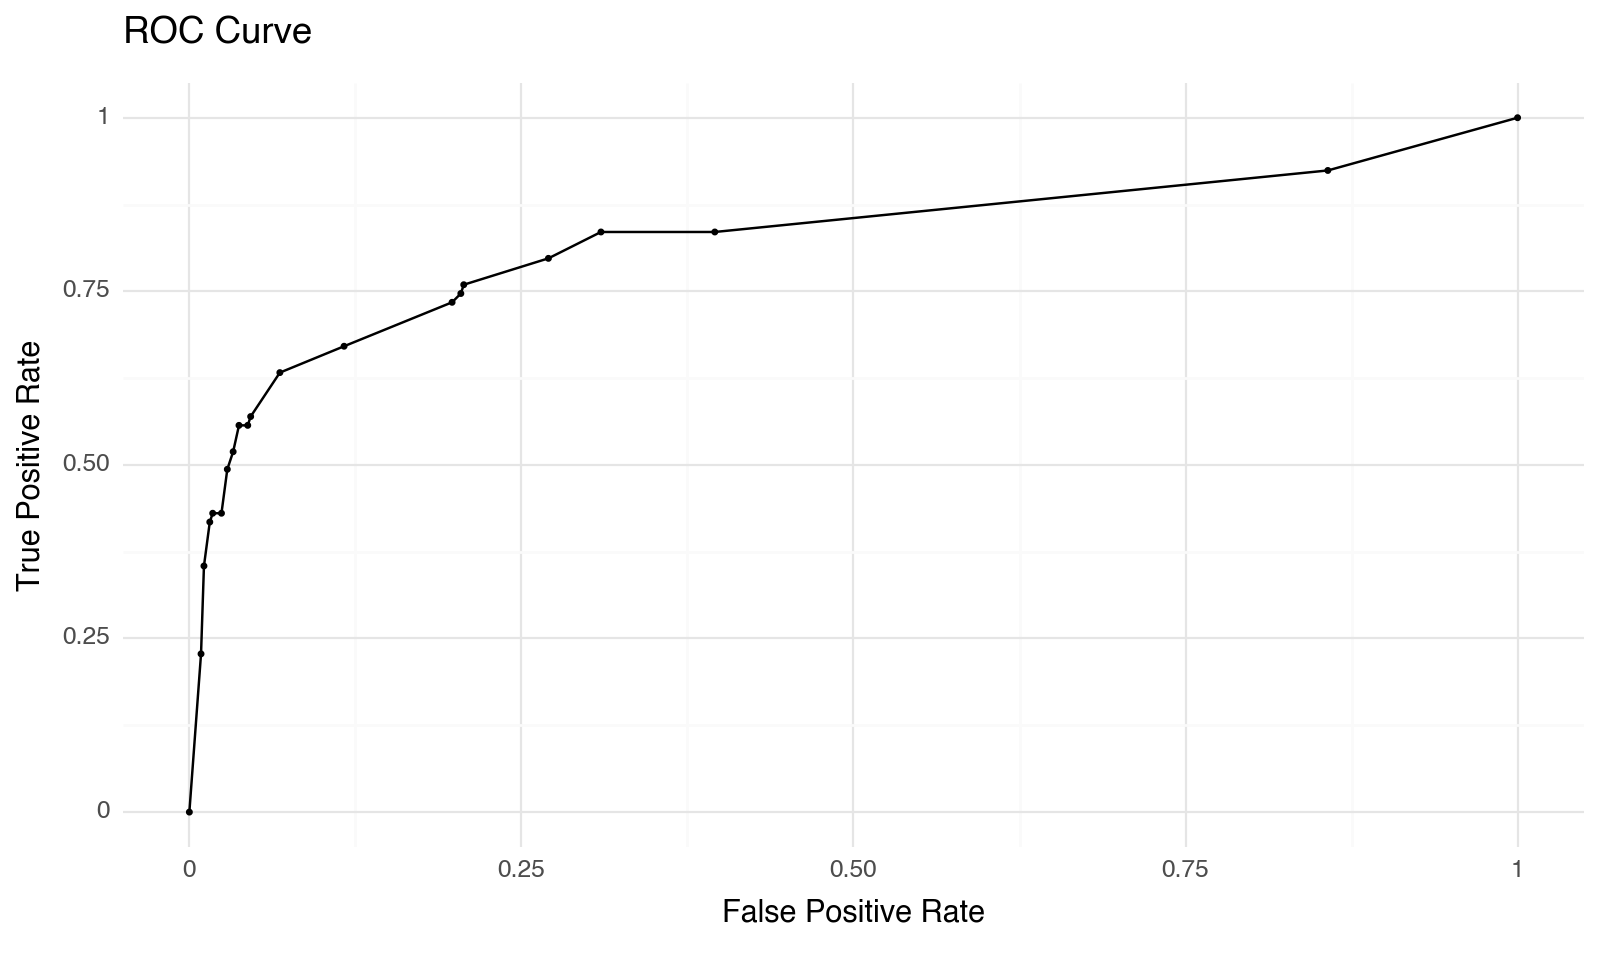

<Figure Size: (800 x 480)>

In [41]:
#Step 8.3 : Finding the optimum threshhold
from plotnine import *
import plotnine
# Step 1 :  Create the ROC curve



fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr


# Step 2 :  ROC Curve Plots 

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate')+
    ylab('True Positive Rate')+
    theme_minimal()
)




[0.         0.47523157 0.59206042 0.64132288 0.65024044 0.64805475
 0.69250704 0.70843339 0.73222432 0.72971239 0.73710928 0.76797784
 0.76989539 0.76743426 0.77083433 0.77626496 0.76281649 0.75930725
 0.71058997 0.363328   0.        ]
Best Threshold: 0.4244 with G-Mean: 0.7763
FPR: 0.2066, TPR: 0.7595


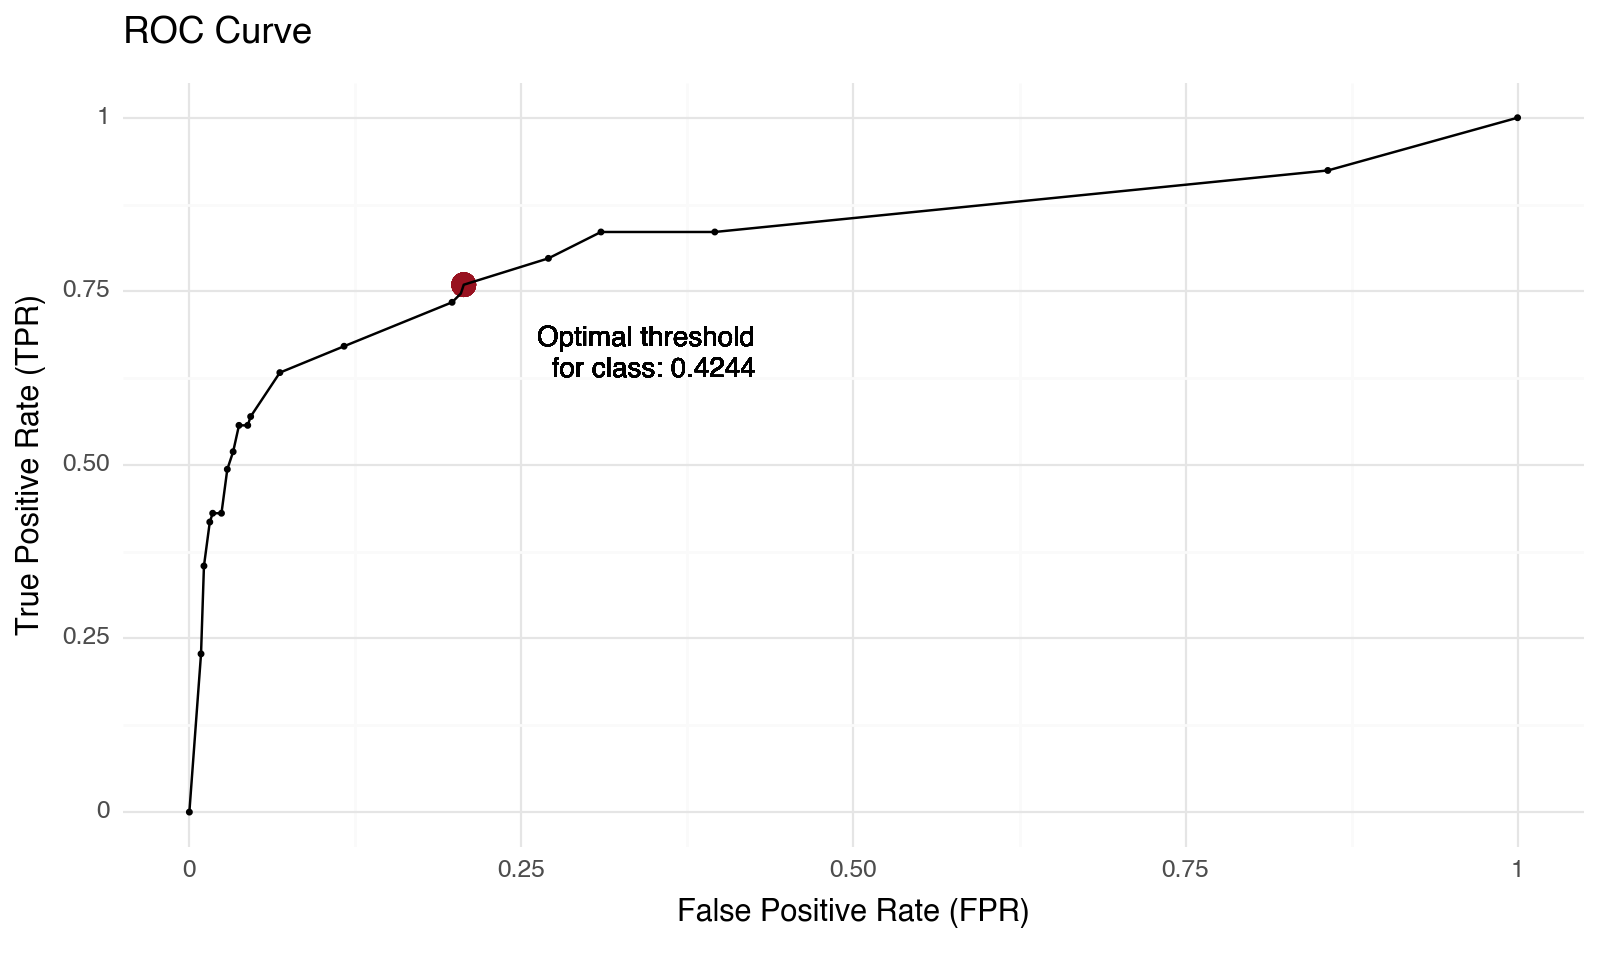

<Figure Size: (800 x 480)>

In [42]:

#Step 3 : G-mean= Geometric Mean of recall and Specificity 



gmean = np.sqrt(tpr * (1 - fpr))

print(gmean)

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))



#Step 4 : G-mean= Geometric Mean of recall and Specificity 
gmean = np.sqrt(tpr * (1 - fpr))


# Find the optimal threshold
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

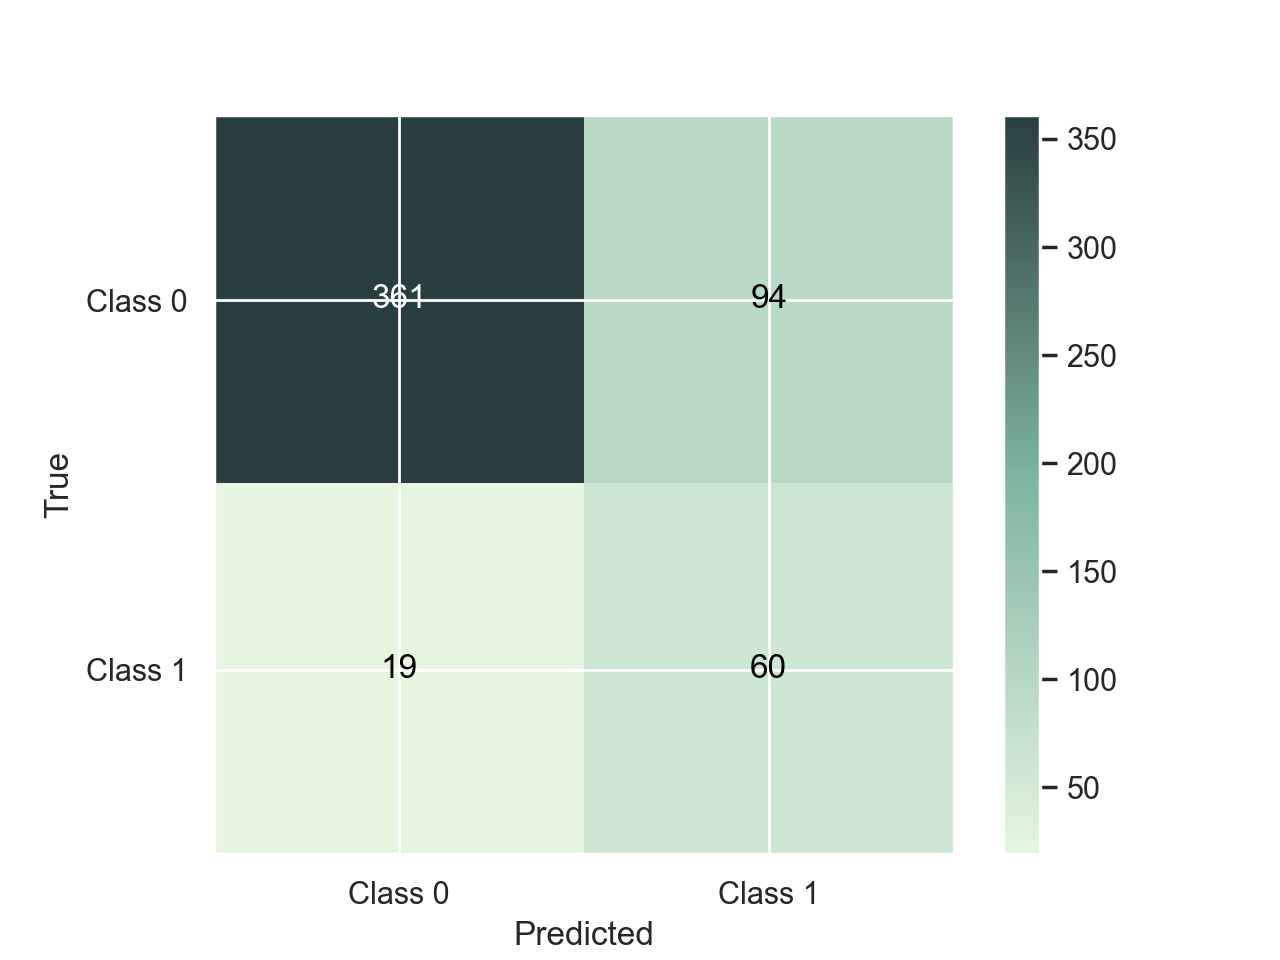

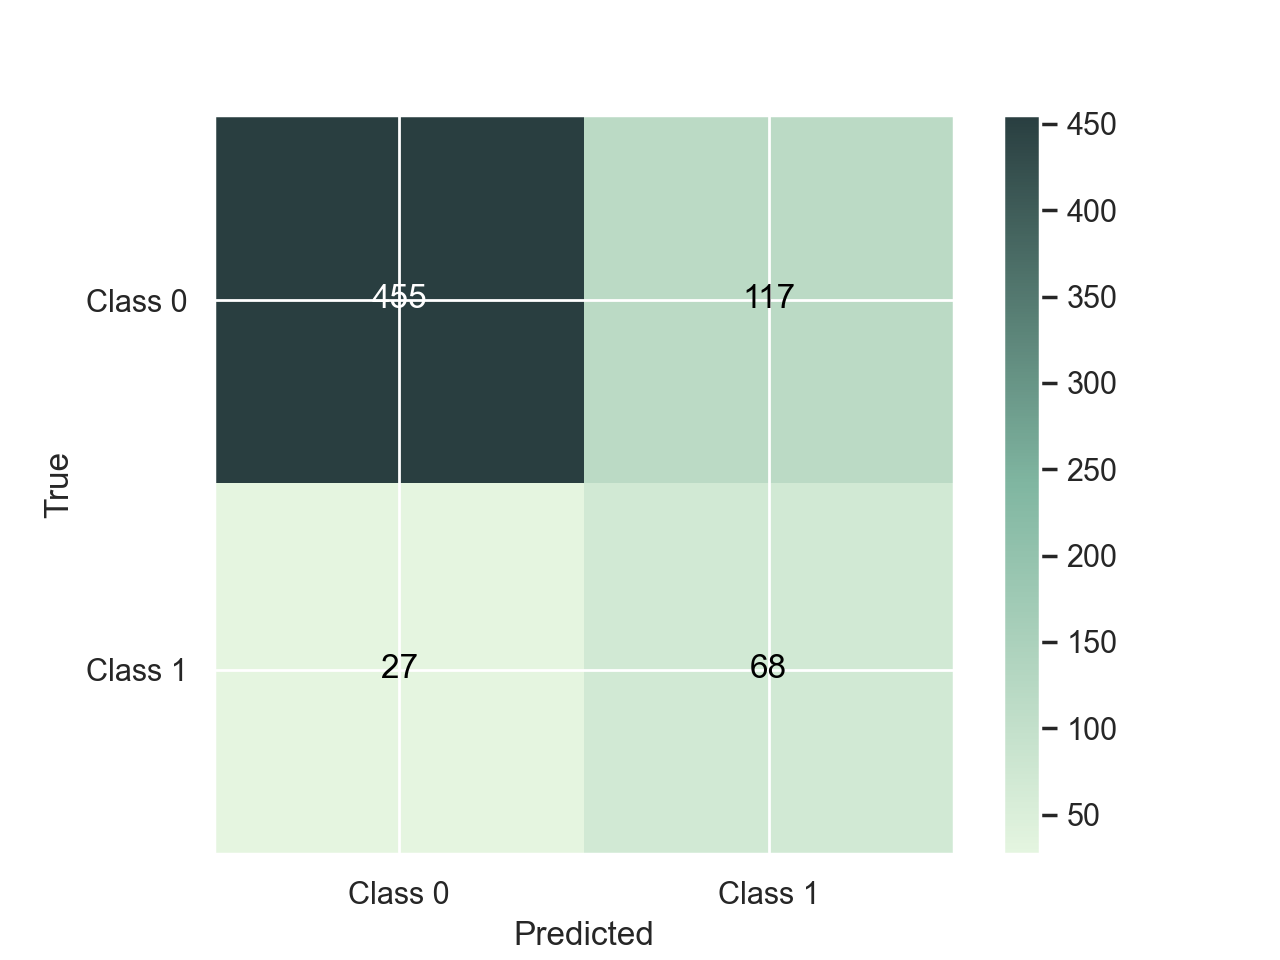

In [43]:
# Create two subplots side by side

plot_ConfusionMatrix(cm1)
plot_ConfusionMatrix(cm2)

In [44]:
# #Step 8.2 : Hyperparameter tuning of Decision Tree 

# from sklearn.model_selection import GridSearchCV


# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 6, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=Dtree_Model_clf, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
# grid_search.fit(X_test, predicted_class1)
# best_params = grid_search.best_params_
# best_classifier = grid_search.best_estimator_

In [45]:
#Step 9 : Feature Importance 

feature_names = FeatureList

df_feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
df_feature_importances=df_feature_importances[(abs(df_feature_importances["Importance"])>0)]
df_feature_importances


chartDtree = alt.Chart(df_feature_importances).mark_bar().encode(
    x=alt.X('Importance'),
    y=alt.Y('Feature', sort='-x',axis=alt.Axis(labelLimit=800)),
    # color=alt.Color('Importance', scale=alt.Scale(color=custom_colors)),
    color=alt.value('#62D84E'),
    tooltip=['Feature','Importance']
).properties(
    title='Feature Downsell',
    width=700,
    height=300)
chartDtree = chartDtree.configure_axisY(
    title=None  # Set title to None to hide the y-axis label
).configure_mark(
    strokeWidth=0.3,  # Set the width of the border
    stroke='black'  # Set the color of the border
)
chartDtree

alt.Chart(...)

In [46]:
df_feature_importances

,Feature,Importance
0,Total eve charge,0.076514
1,Customer service calls,0.209548
2,Total day minutes,0.267579
3,Total day charge,0.094181
4,Total eve minutes,0.094500
5,Total intl charge,0.022639
6,Total day calls,0.004263
7,Total intl calls,0.082983
8,Total night minutes,0.042083
9,Total intl minutes,0.105711


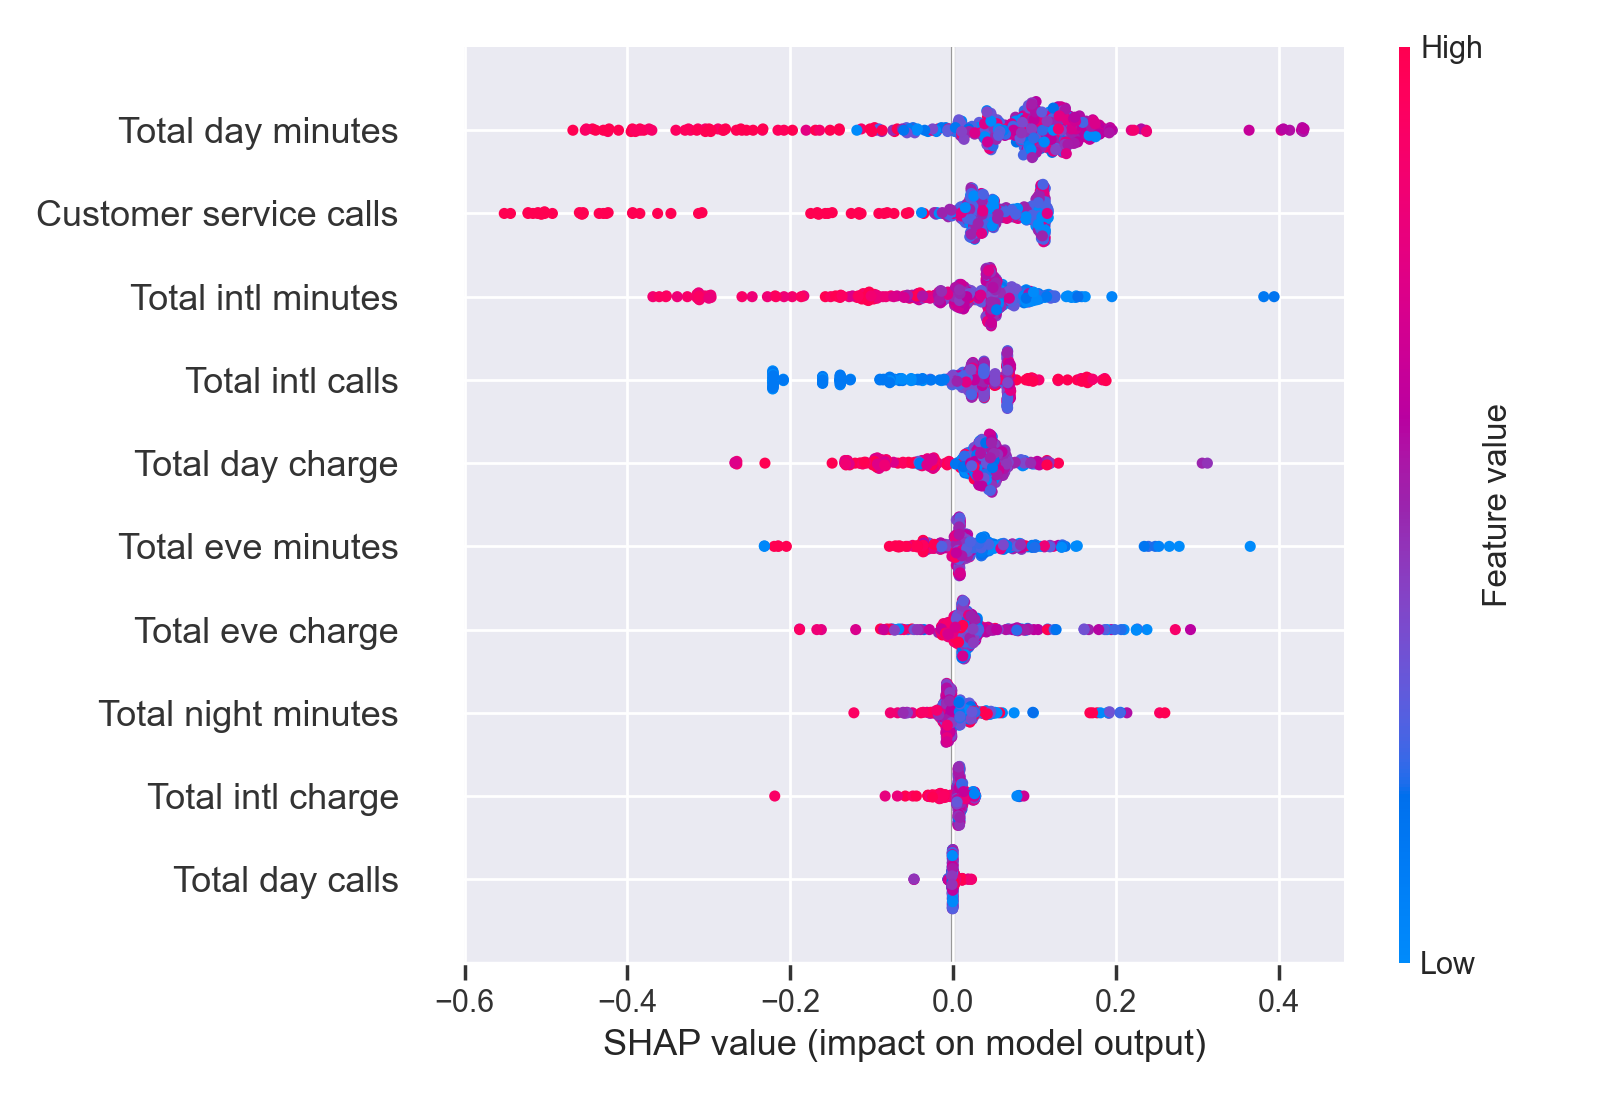

In [47]:
#Step 10 : Shapley 
import shap


explainer = shap.Explainer(Dtree_Model_clf)
shap_values = explainer.shap_values(X_test)

shap_values


shap.summary_plot(shap_values[0], X_test)


# Y-axis indicates the feature names in order of importance from top to bottom.
# X-axis represents the SHAP value, which indicates the degree of change in log odds.
# The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.
# Each point represents a row of data from the original dataset.
# If you look at the feature Total Day Minutes', you will see that it is mostly high with a negative SHAP value. It means higher columns counts tend to negatively affect the output.
# https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

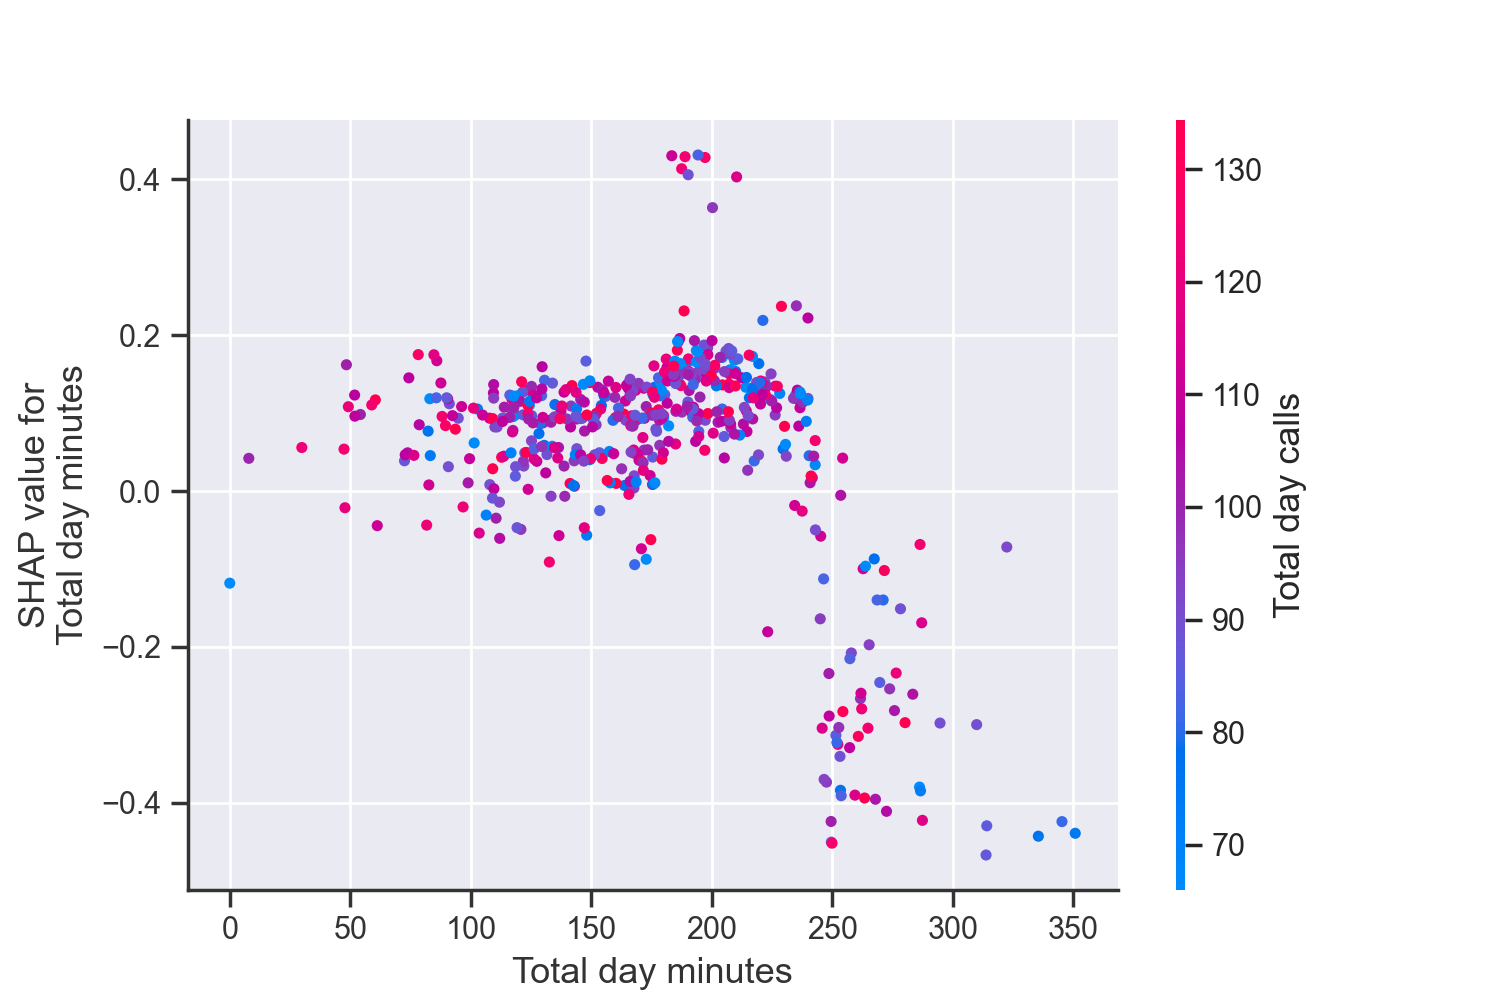

In [48]:
shap.dependence_plot("Total day minutes", shap_values[0], X_test,interaction_index="Total day calls")

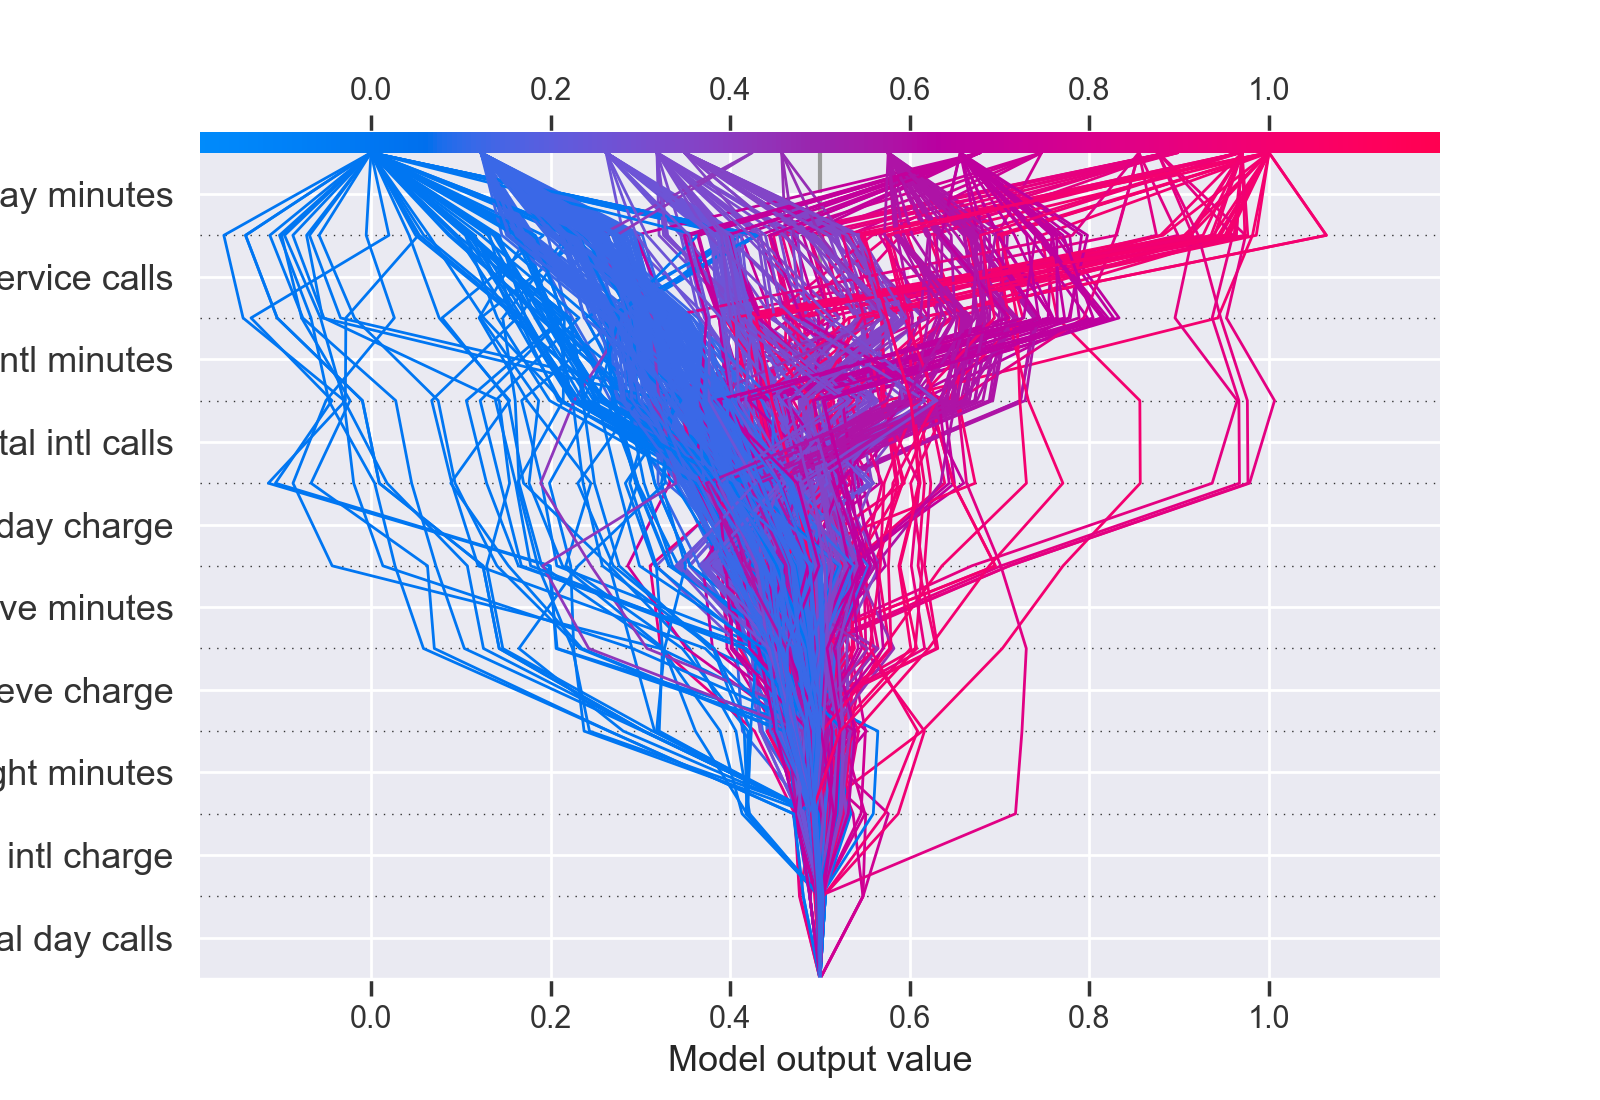

In [49]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)



In [50]:
#Step 11 : Conclusion Ideas 


# Feature Importance 

# 0	Total eve charge	0.076514
# 1	Customer service calls	0.209548
# 2	Total day minutes	0.267579
# 3	Total day charge	0.094181
# 4	Total eve minutes	0.094500
# 5	Total intl charge	0.022639
# 6	Total day calls	0.004263
# 7	Total intl calls	0.082983
# 8	Total night minutes	0.042083
# 9	Total intl minutes	0.105711



# Results on Test data1
# Accuracy: 0.7883895131086143
# Precision: 0.38961038961038963
# Recall: 0.759493670886076
# F1 Score: 0.5150214592274679
# AUC: 0.7764501321463347


# Results on Unseen Data 

# Accuracy: 0.7841079460269865
# Precision: 0.3675675675675676
# Recall: 0.7157894736842105
# F1 Score: 0.4857142857142857
# AUC: 0.755622009569378
